# GRO620 - Activité procédurale 1

Dans cette activité, nous allons principalement travailler sur les éléments nécessaires pour capter une image numériquement, les transformations entre repères 2D et 3D, et l'encodage numérique de la couleur.

In [10]:
# Préambule

import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

## Si vous utilisez Google Colab, vous devez d'abord monter votre Google Drive
## où se trouve vos données. 
## Commentez les trois lignes suivantes en ajustant le chemin vers votre propre
## dossier :

# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd /content/gdrive/MyDrive/gro620-e21

## Pour retrouver le chemin depuis Jupyter, vous pouvez utiliser ceci :
# !ls /content/gdrive/MyDrive


## Acquisition

### Q1.1

À partir de la figure 2.23 du livre de référence, décrivez en une phrase le rôle de chacune des étapes de la chaîne d'acquisition d'images numériques.

*(réponse ici)*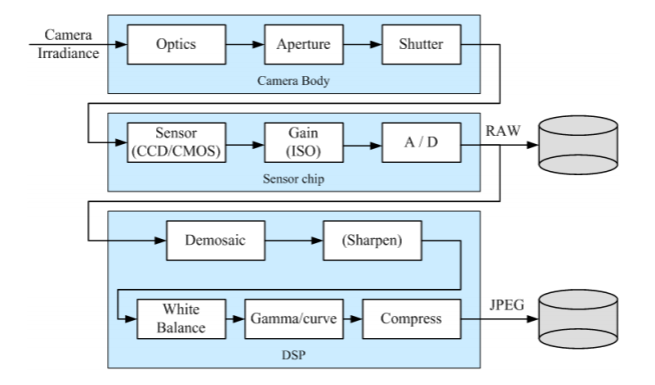

*Question complétée à environ 20mins jusqu'à 1heure 31mins de l'enregistrement procédural 1*

#### Optics:
Réorientation de l'image vers le capteur;

#### Aperture: 
Régler le diamètre de la lentille, pour définir la quantité de lumière qui peut être focusé, sans avoir un long shutter;

#### Shutter:
Le nombre de temps que la lumière peut passer et influencer notre capteur;

#### Sensor(CCD/CMOS):
Matrice de celulles qui vient mesurer la quantité de photons captés par chaque cellule, produisant des quantités électriques;

#### Gain(ISO):
Sert à amplifier le signal analogique;

#### A/D:
Sert à convertir l'analogique en digital;

#### Demosaic:
Mettre l'information captée par le sensor en image pixelisée (Bayer RGB pattern utilisé, car une cellule ne peut être pour plus d'une couleur RGB);

#### Sharpen:
Augmenter les différences entre les différents pixels, dû au `Demosaic`, car cette méthode vient flouté un peu l'image vu qu'on regarde dans les sites à côtés;

#### White Balance:
Sert à s'assurer qu'un objet blanc aie des valeurs égales en RGB (revenir à la neutralité);

#### Gamma curve:
Représente la courbe de transition entre les blancs et les noirs qui tente de s'approcher d'une linéarité, à une courbe plus `smooth` en forme de S;

#### Compress:
Sert à avoir des fichiers utilisables avec l'info pertinente (JPEG vs PNG).


### Q1.2

Quelle est la différence entre paramètres intrinsèques et extrinsèques d'une caméra ? Décrivez chaque type en une phrase.

*(réponse ici)*

*Complété à 1heure 32mins*

#### Intrinsèque:
Ce qui affecte la géométrie de l'image, mais qui est propre à la caméra;

ex: 

#### Extrinsèque:
Ce qui affecte la géométrie de l'image, mais qui n'est pas en lien avec les caractéristiques de la caméra;

ex: position par rapport à la référence globale

### Q1.3

Soit la configuration intrinsèque d'une caméra représentée par la matrice $K$ :

$$
K = \begin{bmatrix} 
 620 &   0 & 1024 \\ 
   0 & 620 &  512 \\ 
   0 &   0 &    1 
\end{bmatrix}
$$

Le capteur de cette caméra a une taille de 30 mm x 15 mm.

Pouvez-vous estimer la distance focale en mm de la lentille de cette caméra à partir de la matrice $K$ ?

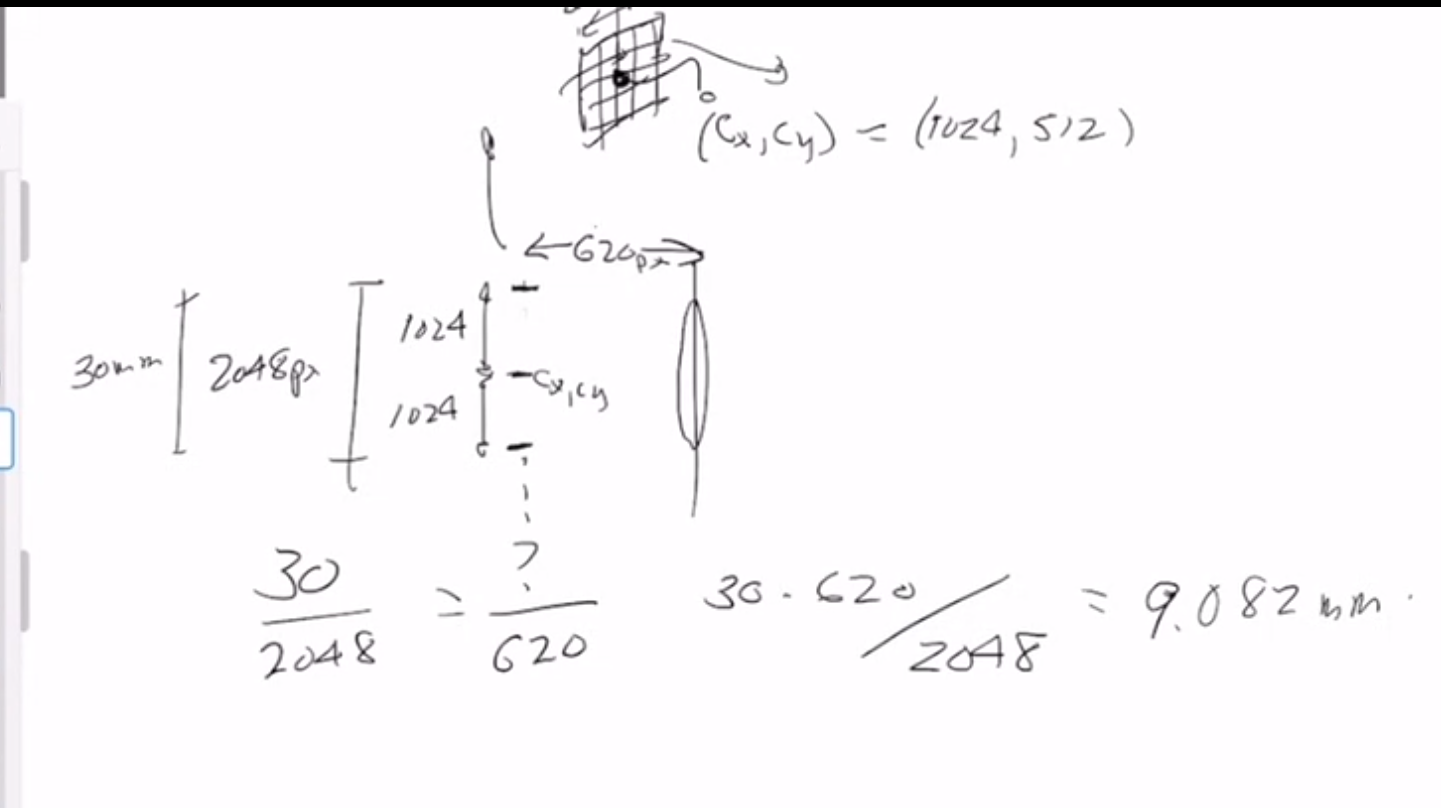

In [15]:
# Réponse ici.
K = np.array([[620.,   0., 1024.],
              [  0., 620.,  512.],
              [  0.,   0.,    1.]
])

# distance focal = (largeur du capteur (ici en mm) / (K1,3 ou moitié de la largeur du capteur (en px) *2)) *  distance entre capteur et lentille (px)
f = (30 / (1024 * 2)) * 620
print(f)


9.08203125


### Q1.4

Dans le cadre de cet APP, nous considérons les caméras comme étant idéales, c'est-à-dire qu'on peut obtenir leurs caractéristiques intrinsèques et extrinsèques à partir de quelques paramètres seulement.

**a)** Qu'est-ce qui rend les vraies caméras non-idéales ? Nommez des facteurs autant pour les caractéristiques intrinsèques que extrinsèques.

*(réponse ici)*

*Complété à 1heure 49mins et 1heure 56mins*

#### Intrinsèques:
Distortion (précis au centre, mais en t'éloignant du centre tu réduis ta précision *fish eye*), facteur s dans matrice K (skew), *chaque bloc blanc dans figure 2.23 du livre peut avoir un impact sur les caractéristiques de la caméra*

#### Extrinsèques:
Position de la caméra par rapport au repère global, *la caméra dans son espace en soit*


**b)** Que doit on faire pour obtenir les caractéristiques d'une caméra non-idéale ?

*(réponse ici)*

*Complété à 1heure 51mins*

*M'assuré d'écouter la réponse à Lolo*

Utilisation d'un échéquier pour calibrer les caractérisitiques intrinsèques et les conditions extrinsèques.

### Q1.5

**a)** Pourquoi deux appareils de capture peuvent produire des valeurs RGB différentes d'une même couleur ? 

*(réponse ici)*

*Complété à 1heure 57mins*

Si toutes les configurations DSP (figure 2.23) ne sont pas pareils, il est possible d'avoir des valeurs RGB différentes.

**b)** Que peut-on faire pour comparer numériquement des couleurs provenant de deux capteurs différents ?

*(réponse ici)*

*Complété à 2heures 1min*

Comme chaque appareil a sa propre définition du RGB, il faut calibrer les appareils pour obtenir cette définition afind de permettre de transformer les couleurs selon un espace commun (ex: CIE chromacticity diagram figure 2.29) pour ensuite comparer les couleurs des deux appareils.

## Repères et coordonnées

### Q2.1

Supposons ces 2 repères :

![](images_doc/proc1-q2_1-frames.png)

**a)** Trouvez la matrice homogène permettant de transformer un point du repère $\{1\}$ au repère $\{0\}$.

In [16]:
T_10 = np.identity(4) # Génère une matrice identité 4x4

T_10 = np.array(
[[0, 1, 0, 240],
 [1, 0, 0, 80],
 [0, 0, -1, 120],
 [0, 0, 0, 1]
])

print("T_10:\n", T_10)

T_10:
 [[  0   1   0 240]
 [  1   0   0  80]
 [  0   0  -1 120]
 [  0   0   0   1]]


**b)** Trouvez maintenant la transformation inverse.

*Complété à 2heures 21mins*

In [18]:
T_01 = np.identity(4)

T_01 = np.linalg.inv(T_10)
print("T_01:\n", T_01)

T_01:
 [[   0.    1.    0.  -80.]
 [   1.    0.    0. -240.]
 [  -0.   -0.   -1.  120.]
 [   0.    0.    0.    1.]]


**c)** Soit le point $p_0 = [8, 5, 1]^T$, un point dans le repère $\{0\}$. Trouvez $p_1$, ses coordonnées dans le repère $\{1\}$.

*Complété à 2heures 23mins*

In [34]:
p_0 = [8, 5, 1]
p_1 = [0, 0, 0]

p_o_h = [8, 5, 1, 0]
p_1 = T_01 @ p_o_h
print(p_1)

[ 5.  8. -1.  0.]


### Q2.2

Supposons maintenant que le repère $\{1\}$ représente une caméra avec les caractéristiques intrinsèques $K$ de la question Q1.3.

**a)** Trouvez la matrice de projection P complète permettant de projeter un point $p$ décrit dans le repère $\{0\}$.

*Complété à 2heures 40mins*

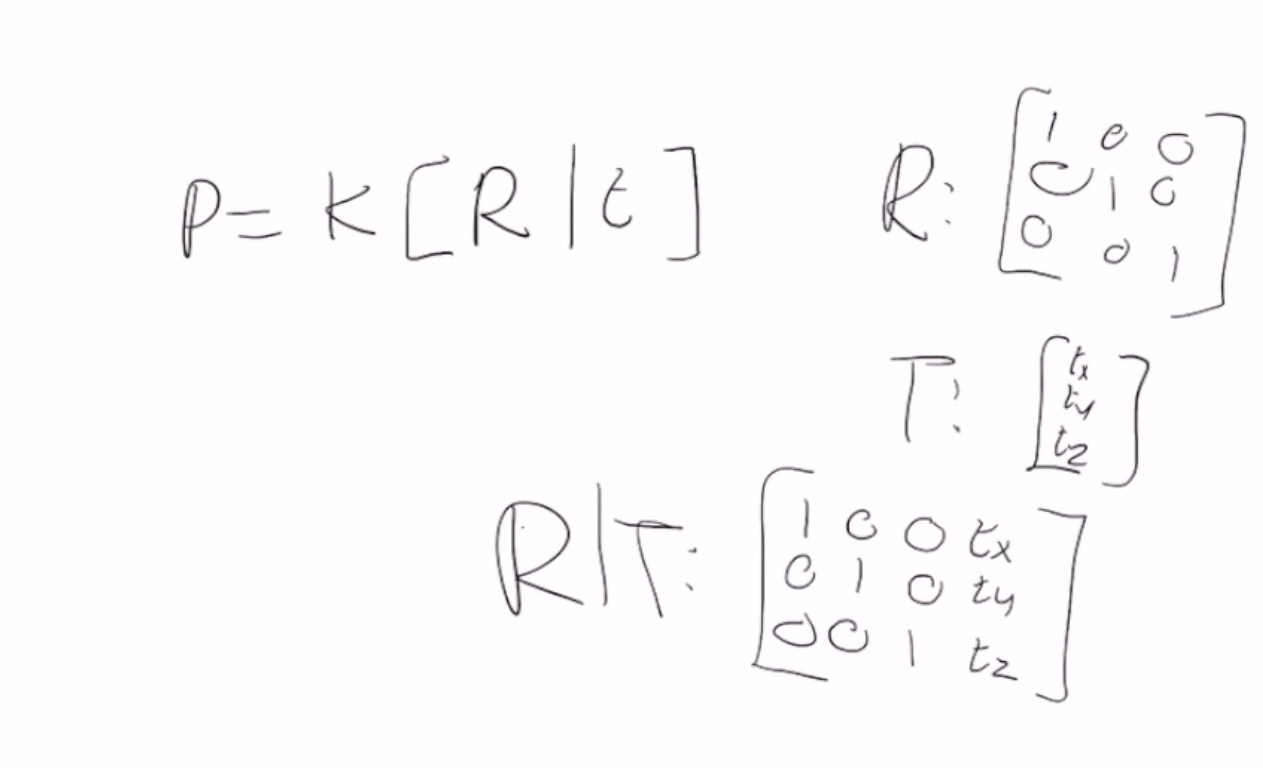

In [29]:
# print(K) # Si vous n'avez pas réutilisé la variable K, elle aura toujours la même valeur qu'à la question Q1.3.

# équation 2.63-64 p.54 du livre p.76 du pdf
# 

R = np.array(
[[0, 1, 0],
 [1, 0, 0],
 [0, 0, -1]
])

T = np.array([[-80], [-240], [120]])

k_augmntd = np.array(
[[620, 0, 1024, 0],
 [0, 620, 512, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1]
])

P = np.dot(k_augmntd, T_01)
print(P)


[[ 0.000e+00  6.200e+02 -1.024e+03  7.328e+04]
 [ 6.200e+02  0.000e+00 -5.120e+02 -8.736e+04]
 [ 0.000e+00  0.000e+00 -1.000e+00  1.200e+02]
 [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]]


**b)** Soit le point $p_0 = [0.250, 0.010, 0.000]$. Trouvez le point $x_s$, les coordonnées du point $p_0$ perçu par la caméra.

*Complété à 2heures 48mins*

In [35]:
p_0 = np.array([0.250, 0.010, 0.000])

Kt = np.zeros([4, 4])
Kt[0:3, 0:3] = K
Kt[3,3] = 1
print(Kt)
Pt = Kt @ T_01

pw = [0.250, 0.010, 0., 1.]
xs = Pt @ pw

xs = xs / xs [2] # Pour obtenir la forme normalizé avec la distance (sur le plan de l'image)
print(Pt)
print(xs) # dernière valeur est la projective of depth

[[6.200e+02 0.000e+00 1.024e+03 0.000e+00]
 [0.000e+00 6.200e+02 5.120e+02 0.000e+00]
 [0.000e+00 0.000e+00 1.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 1.000e+00]]
[[ 0.000e+00  6.200e+02 -1.024e+03  7.328e+04]
 [ 6.200e+02  0.000e+00 -5.120e+02 -8.736e+04]
 [ 0.000e+00  0.000e+00 -1.000e+00  1.200e+02]
 [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]]
[ 6.10718333e+02 -7.26708333e+02  1.00000000e+00  8.33333333e-03]


## Reprojection 2D à 3D

### Q3.1

Supposons que le plan XY du repère $\{0\}$ est un convoyeur. Quelle serait sa largeur maximale (mesurée sur l'axe Y) si on souhaite que la caméra la capte au complet dans son image ? 

*Complété à 3heures 3mins*

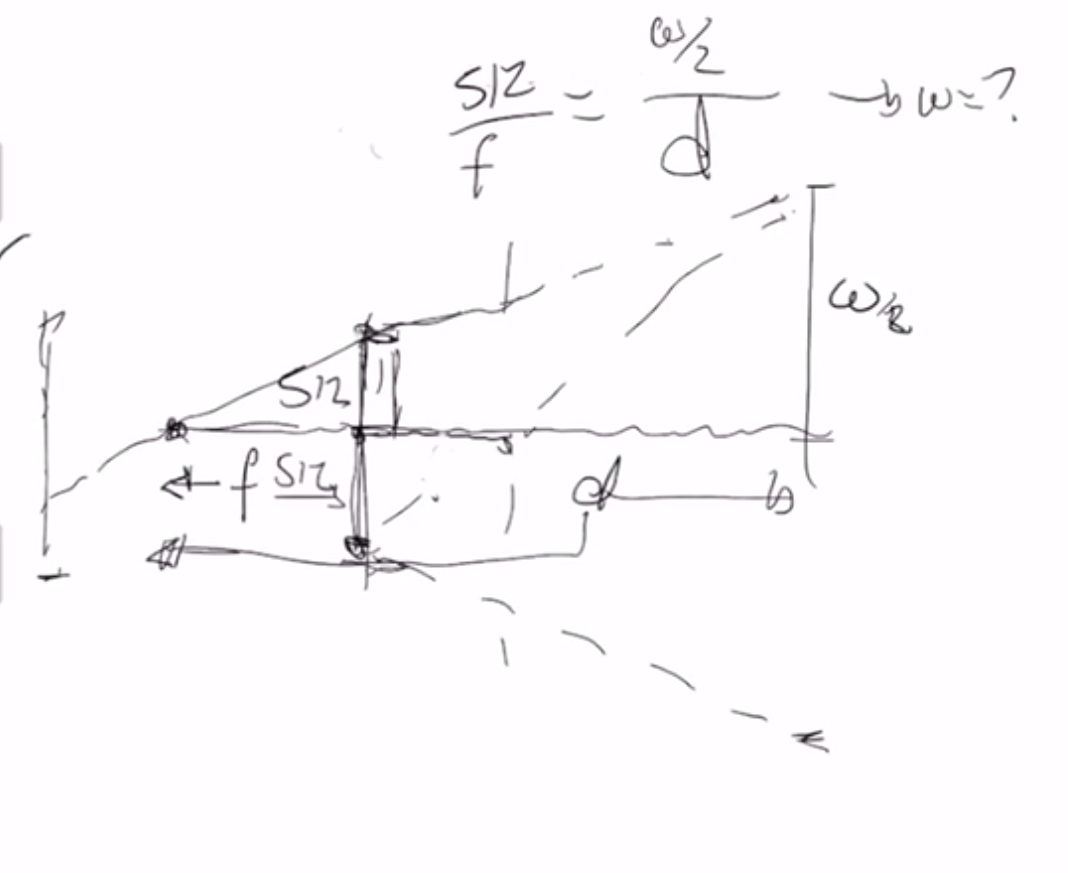

In [38]:
l_conv = 0

### Q3.2

Soit le point $x_s = [120, 200]$, un point dans l'image perçu par la caméra décrite plus haut. On suppose que le point perçu se trouve sur le plan XY du repère $\{0\}$. Trouvez les coordonnées du point $p_0$ qui correspond à ce même point dans le repère $\{0\}$.

*Pas complété en enregistrement*

In [36]:
x_s = np.array([120,200])